In [2]:
from KirschImageProcessing import *
path = "Lenna.png"
k = KirschImageProcessing()
img = k.loadImage(path)
%matplotlib inline

In [21]:
def saveImage(img, name):
    io.imsave("C:\\Users\\Andres\\Desktop\\LennaImages\\"+name, img)

In [43]:
def saveImage2(img, savePath):
    # Guarda en blanco y negro
    toimage(img).save("C:\\Users\\Andres\\Desktop\\LennaImages\\"+savePath)

In [24]:
saveImage(img,"LennaOriginal.jpg",)

In [23]:
imgEqualized = exposure.equalize_adapthist(img)
#saveImage(imgEqualized,"LennaEqualized.jpg",)

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [30]:
imgDenoise = denoise_tv_chambolle(img)
#saveImage(imgDenoise, "LennaDenoise.jpg")

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


array([[ 5.,  5.,  5.],
       [-3.,  0., -3.],
       [-3., -3., -3.]], dtype=float32)

In [44]:
#Kirsch
imgGray = rgb2gray(img)

imgConvolveNorth = convolve(imgGray, k.N)
imgConvolveSouth = convolve(imgGray, k.S)
imgConvolveNorthWest = convolve(imgGray, k.NW)
imgConvolveNorthEast = convolve(imgGray, k.NE)

#saveImage2(imgConvolveNorth, "LennaKirschNorth.jpg")
#saveImage2(imgConvolveSouth, "LennaKirschSouth.jpg")
#saveImage2(imgConvolveNorthWest, "LennaKirschNorthWest.jpg")
3saveImage2(imgConvolveNorthEast, "LennaKirschNorthEast.jpg")

E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


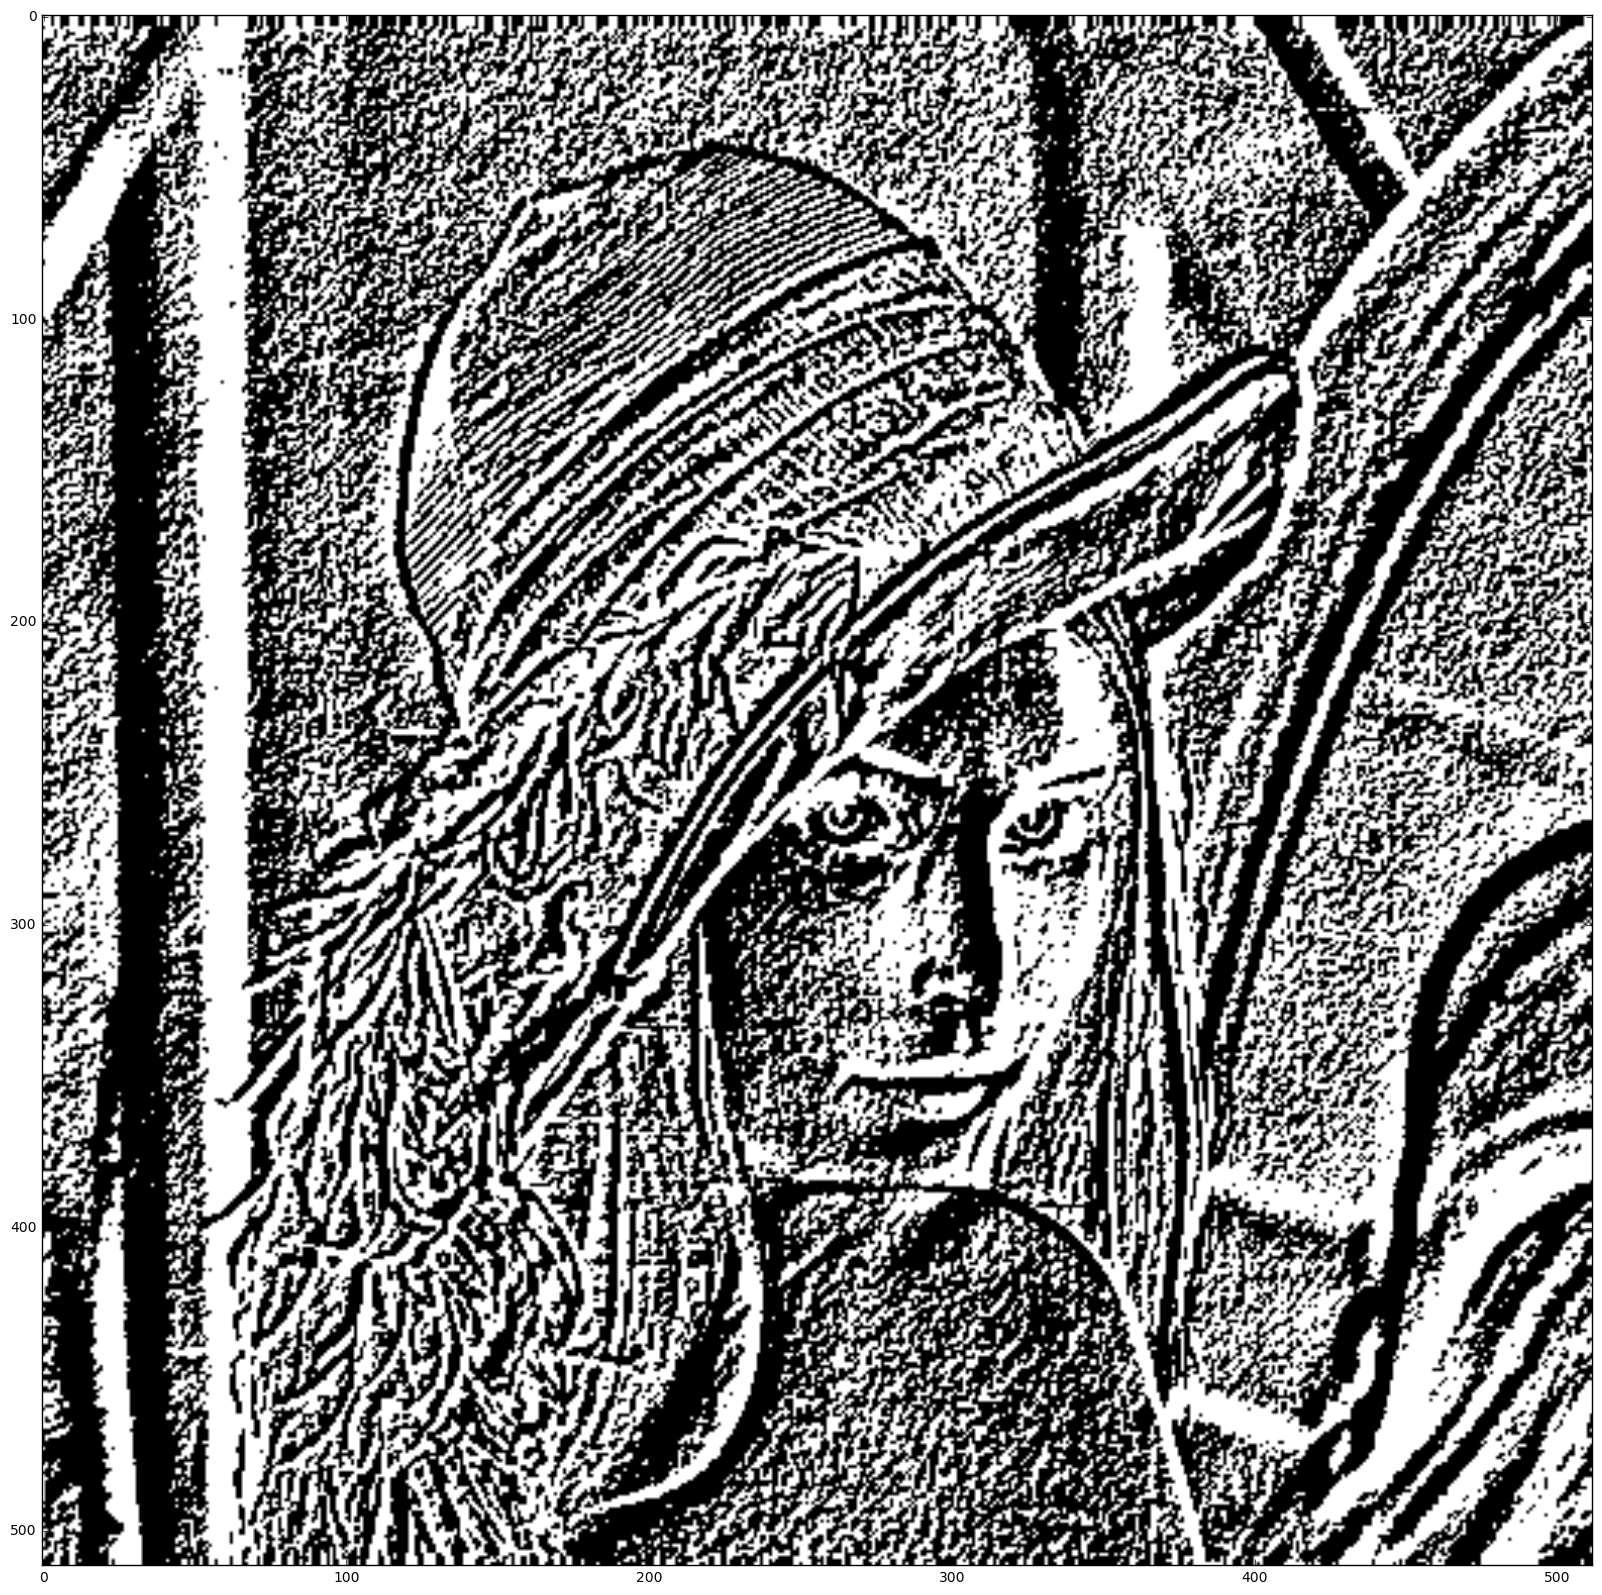

In [46]:
#Binarizar norh west
imgBin = k.binarizeImage(imgConvolveNorthWest)
k.showImage(imgBin)
#saveImage2(imgBin, "LennaBinarized.jpg")

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


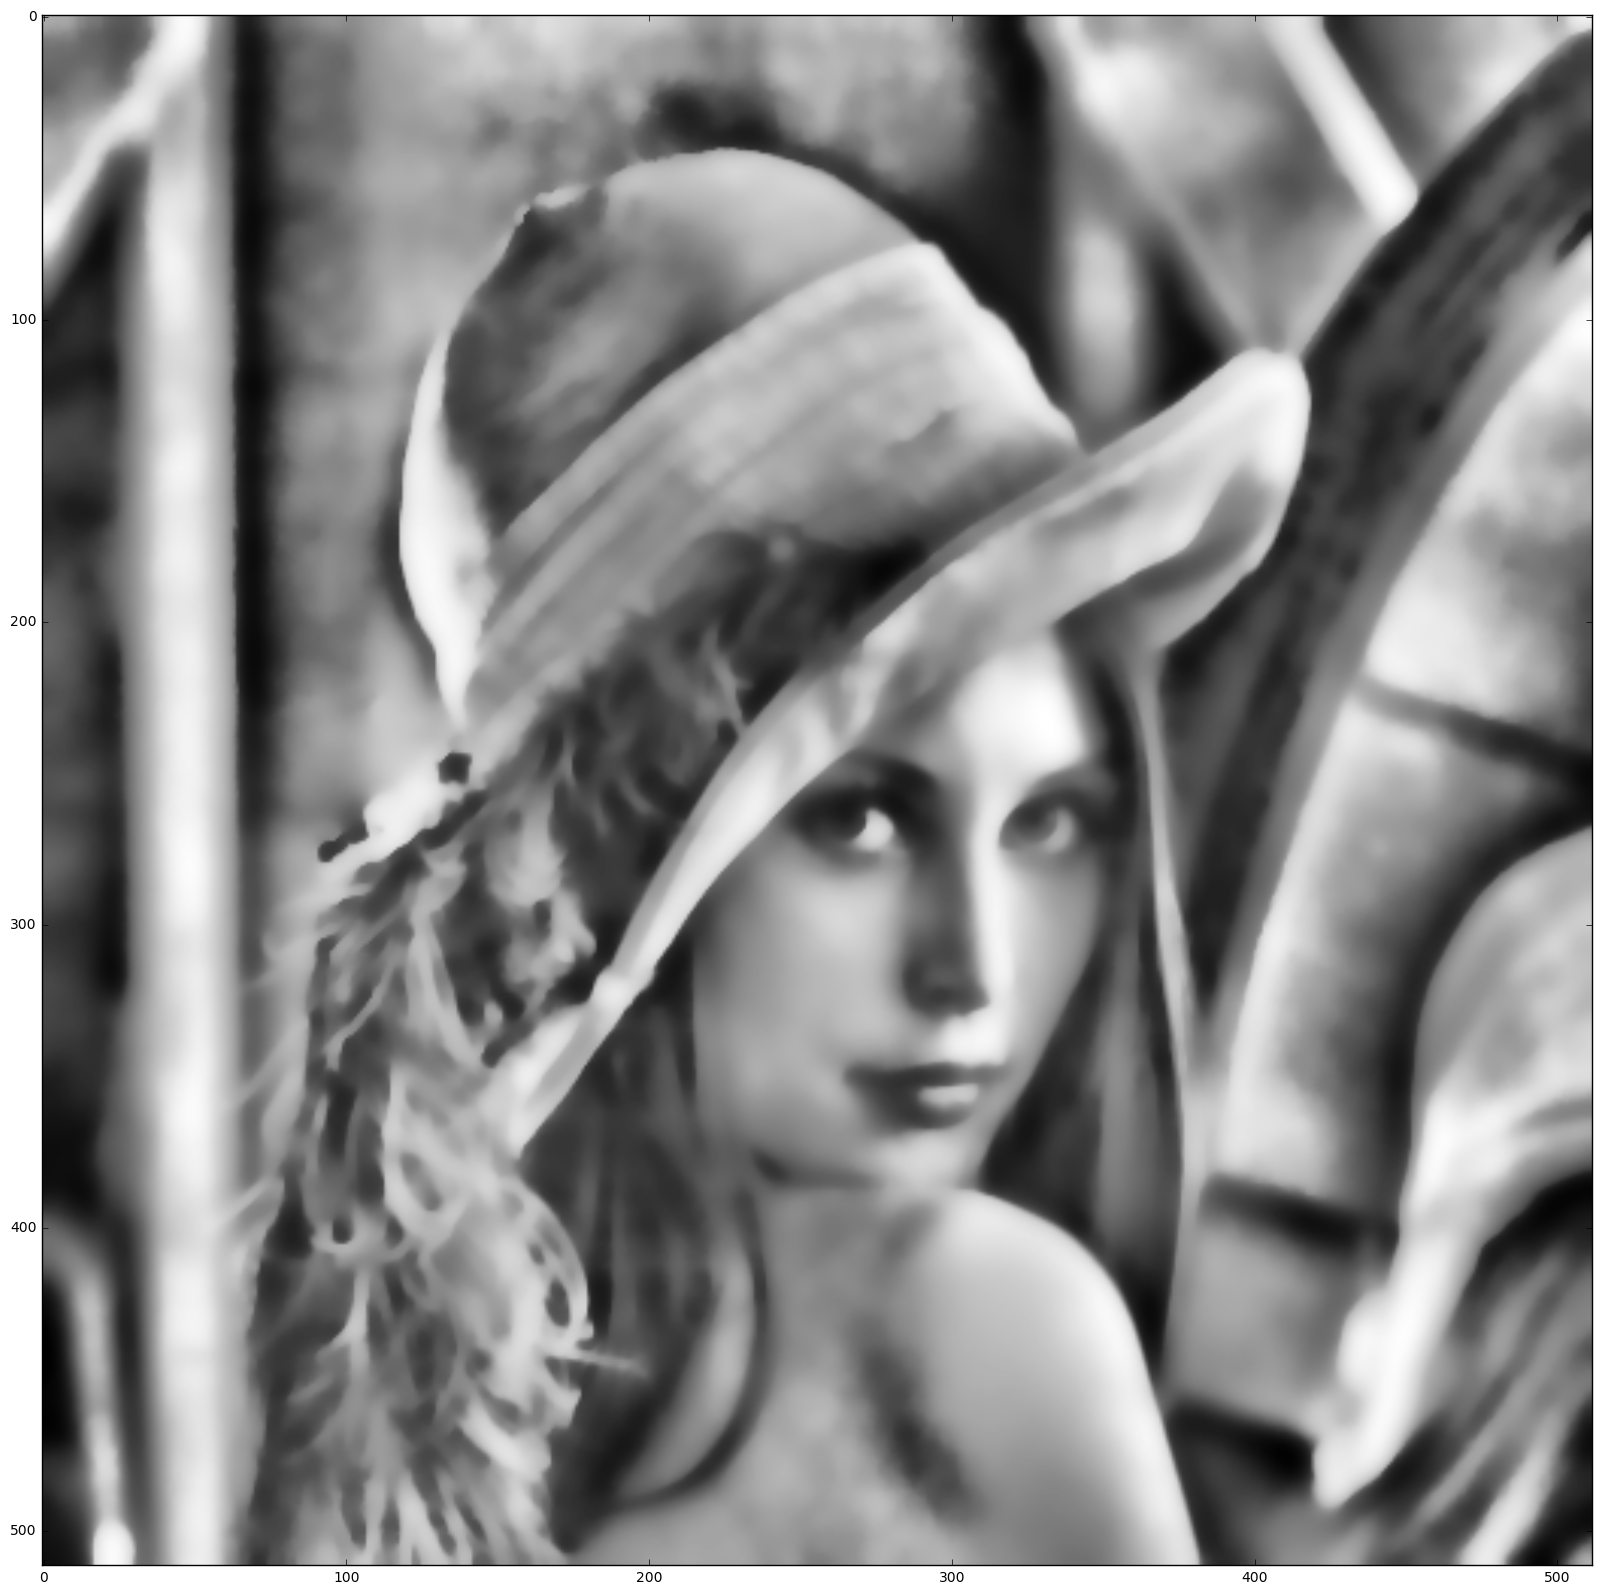

In [60]:
imgPrepared = k.prepareImage(img, w=0.4)
k.showImage(imgPrepared)
#saveImage2(imgPrepared, "LennaGrayEqualizedDenoise.jpg")

In [62]:
imgConvolveNorthWestPrepared = convolve(imgPrepared, k.NW)
#saveImage2(imgConvolveNorthWestPrepared, "LennaKirschNorthWestPrepared.jpg")

E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


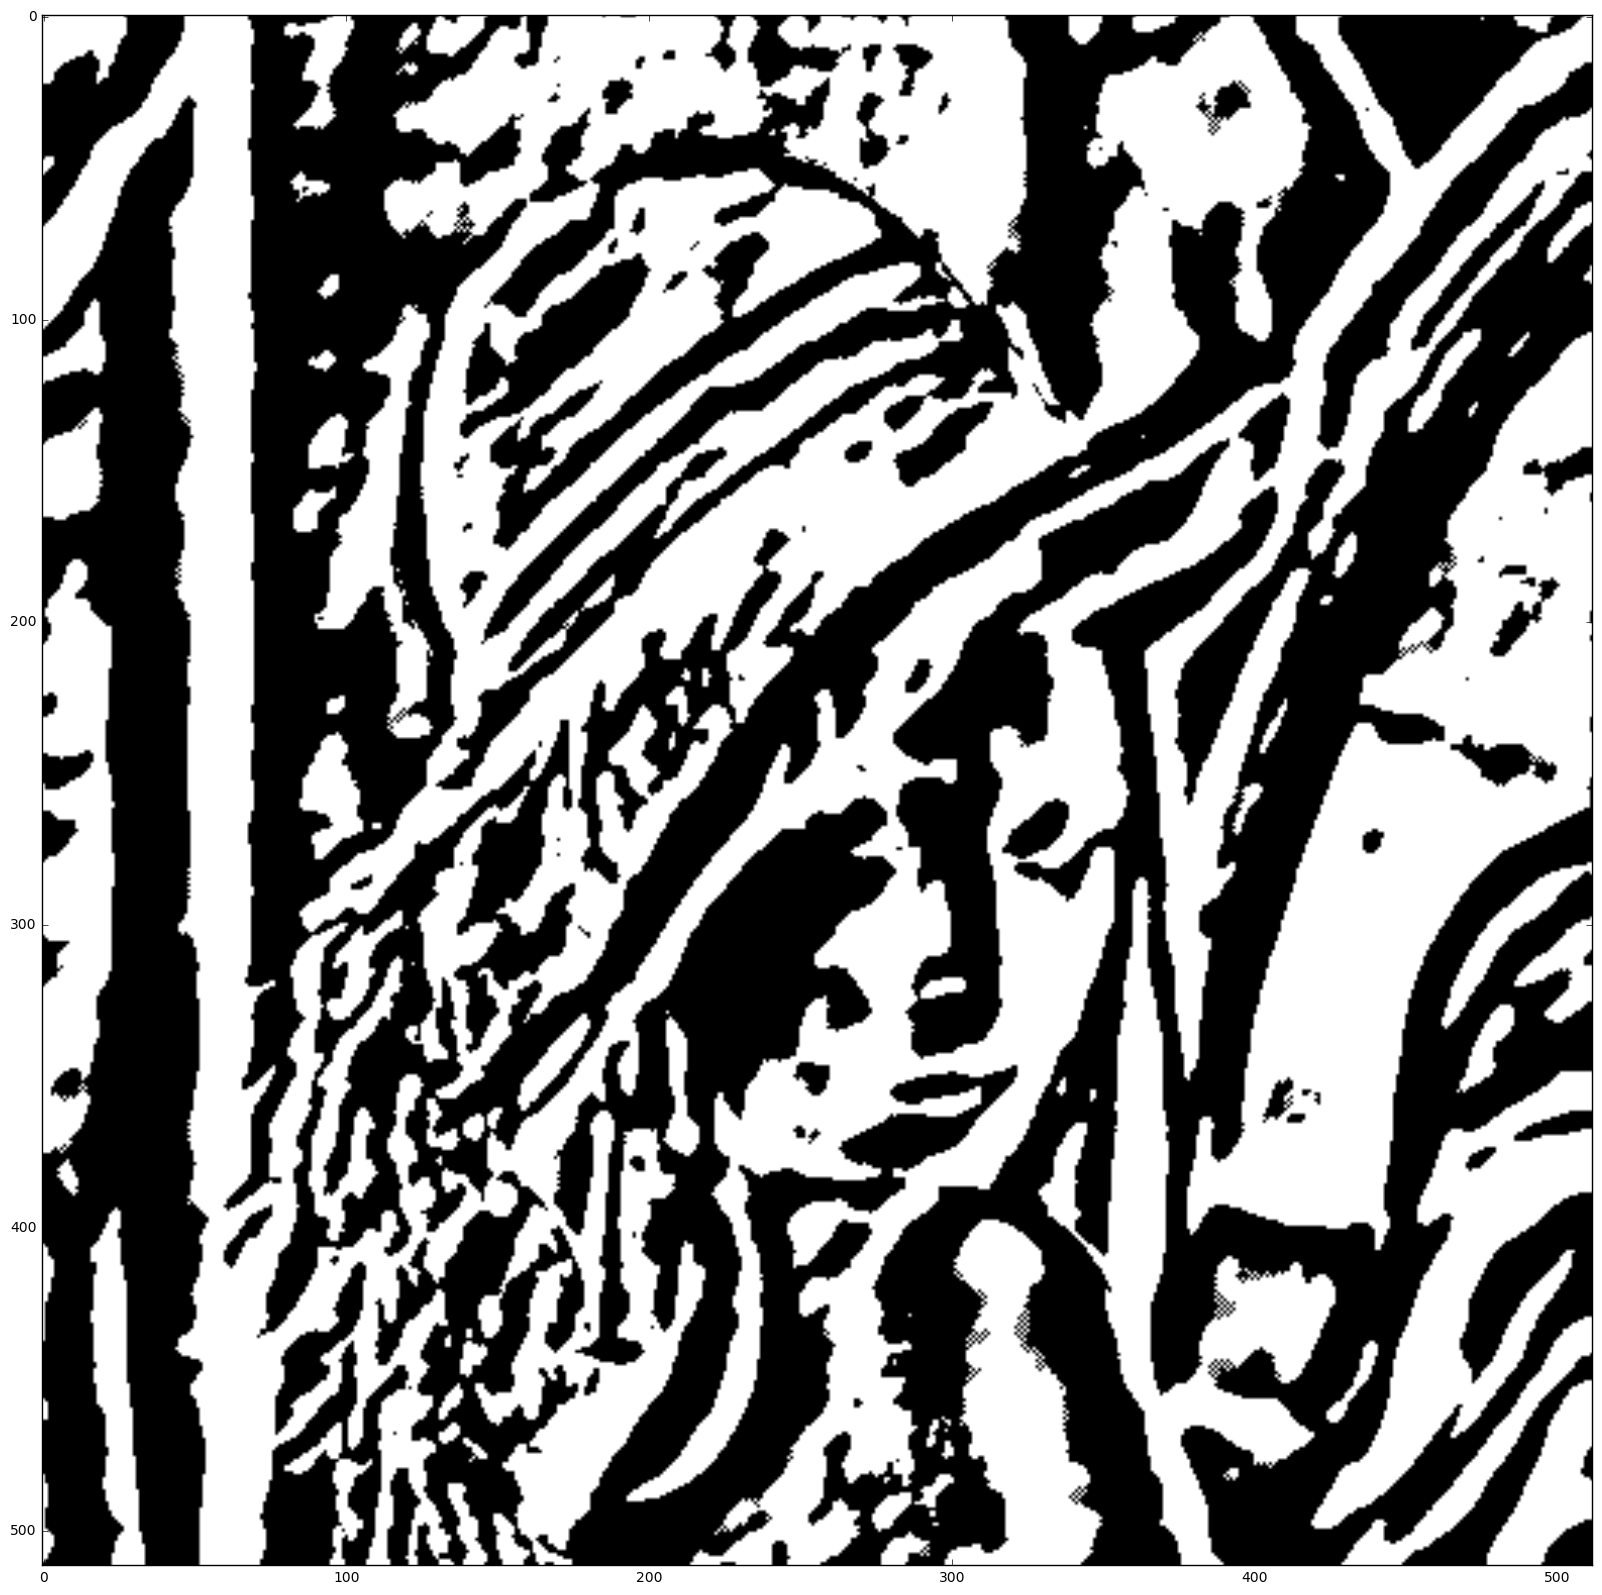

In [64]:
#Binarizar norh west
imgBin2 = k.binarizeImage(imgConvolveNorthWestPrepared)
k.showImage(imgBin2)
#saveImage2(imgBin2, "LennaBinarized2.jpg")

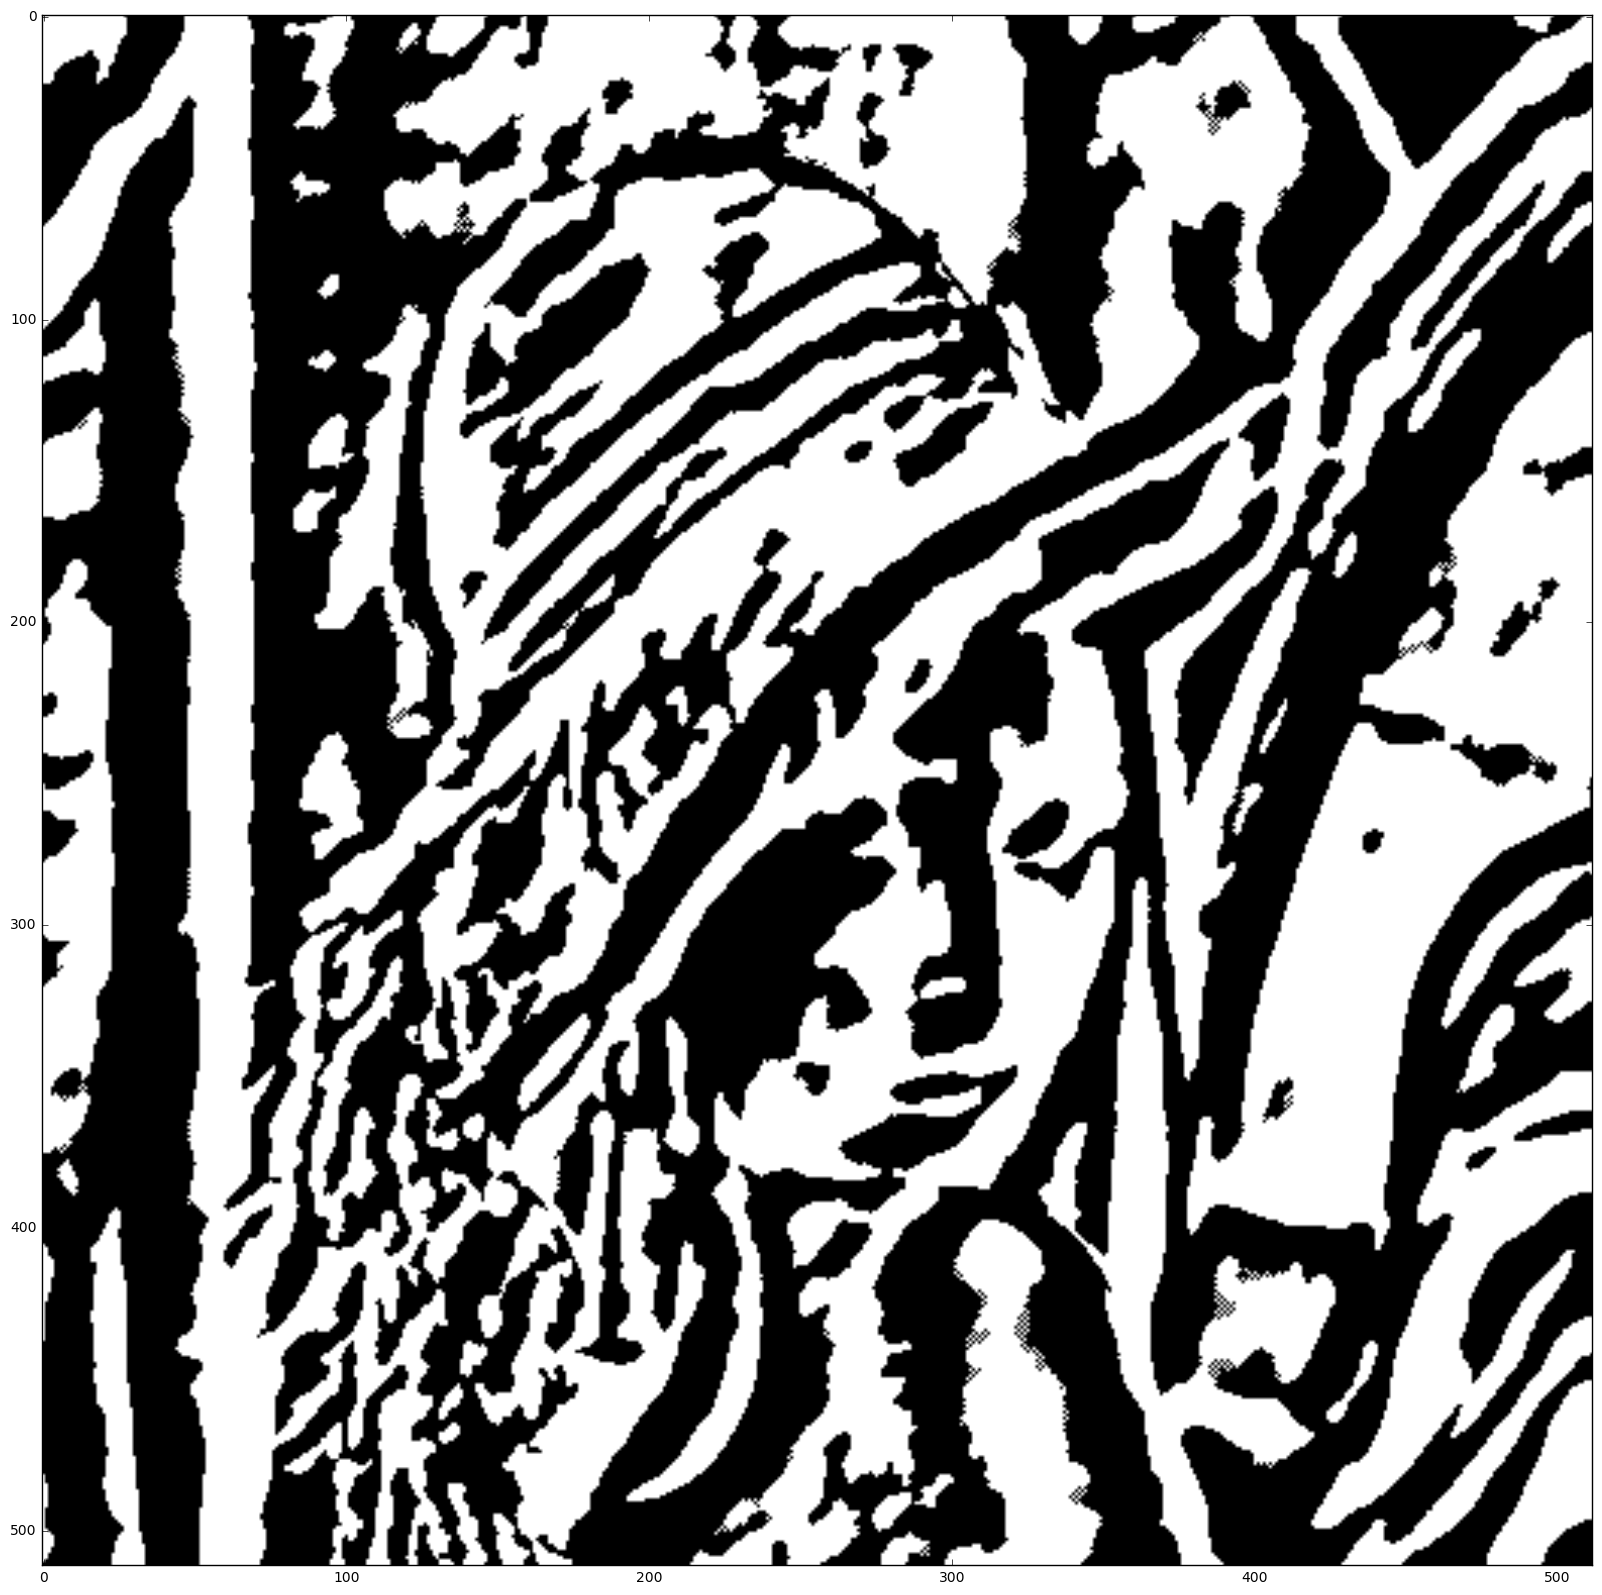

In [68]:
imgRemovedSmall = k.deleteSmallObjects(imgBin2)
k.showImage(imgRemovedSmall)
saveImage2(imgRemovedSmall, "LennaRemovedSmall.jpg")

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


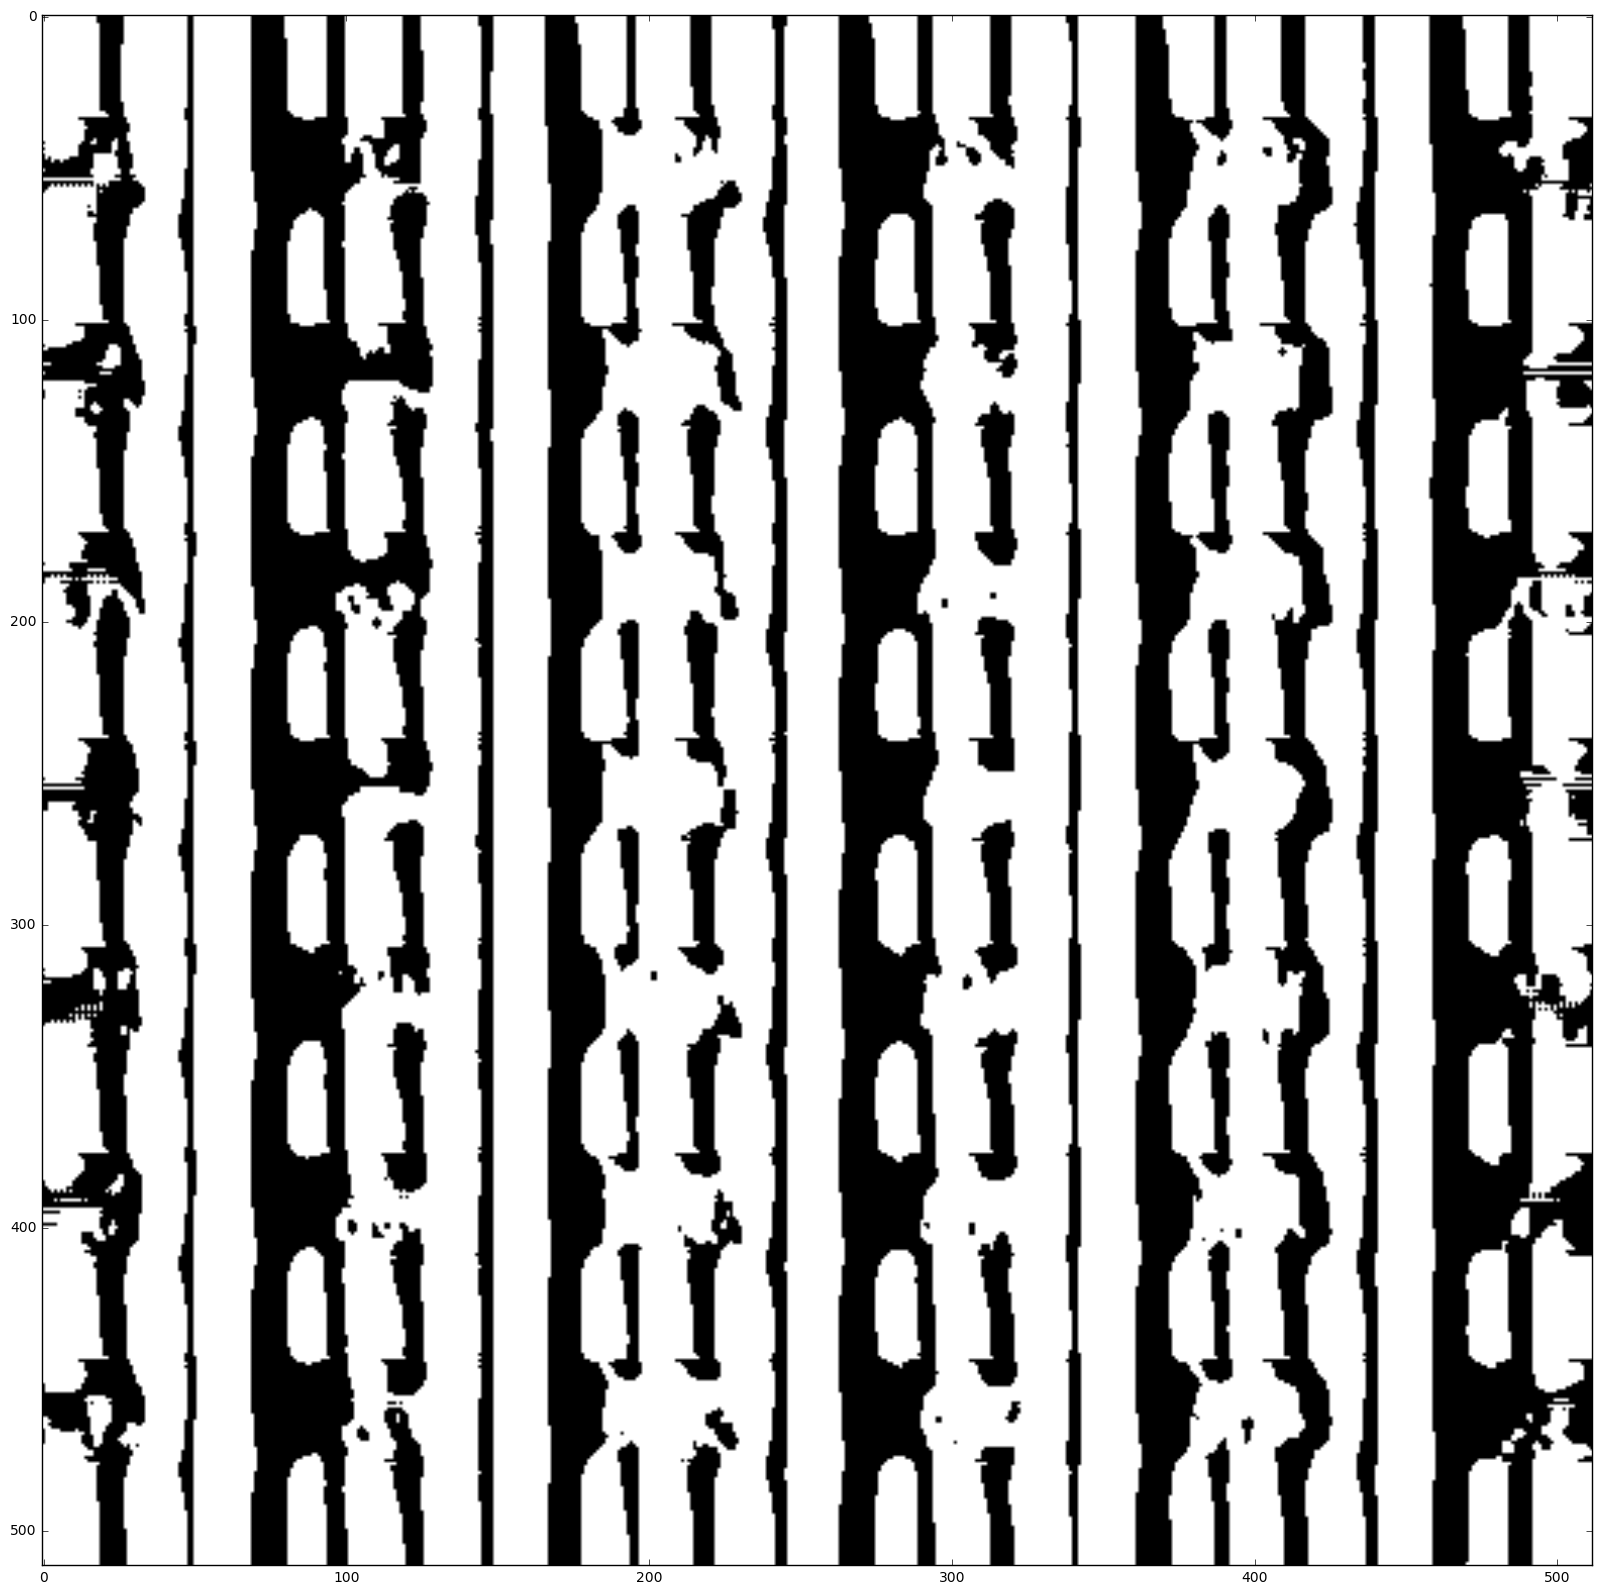

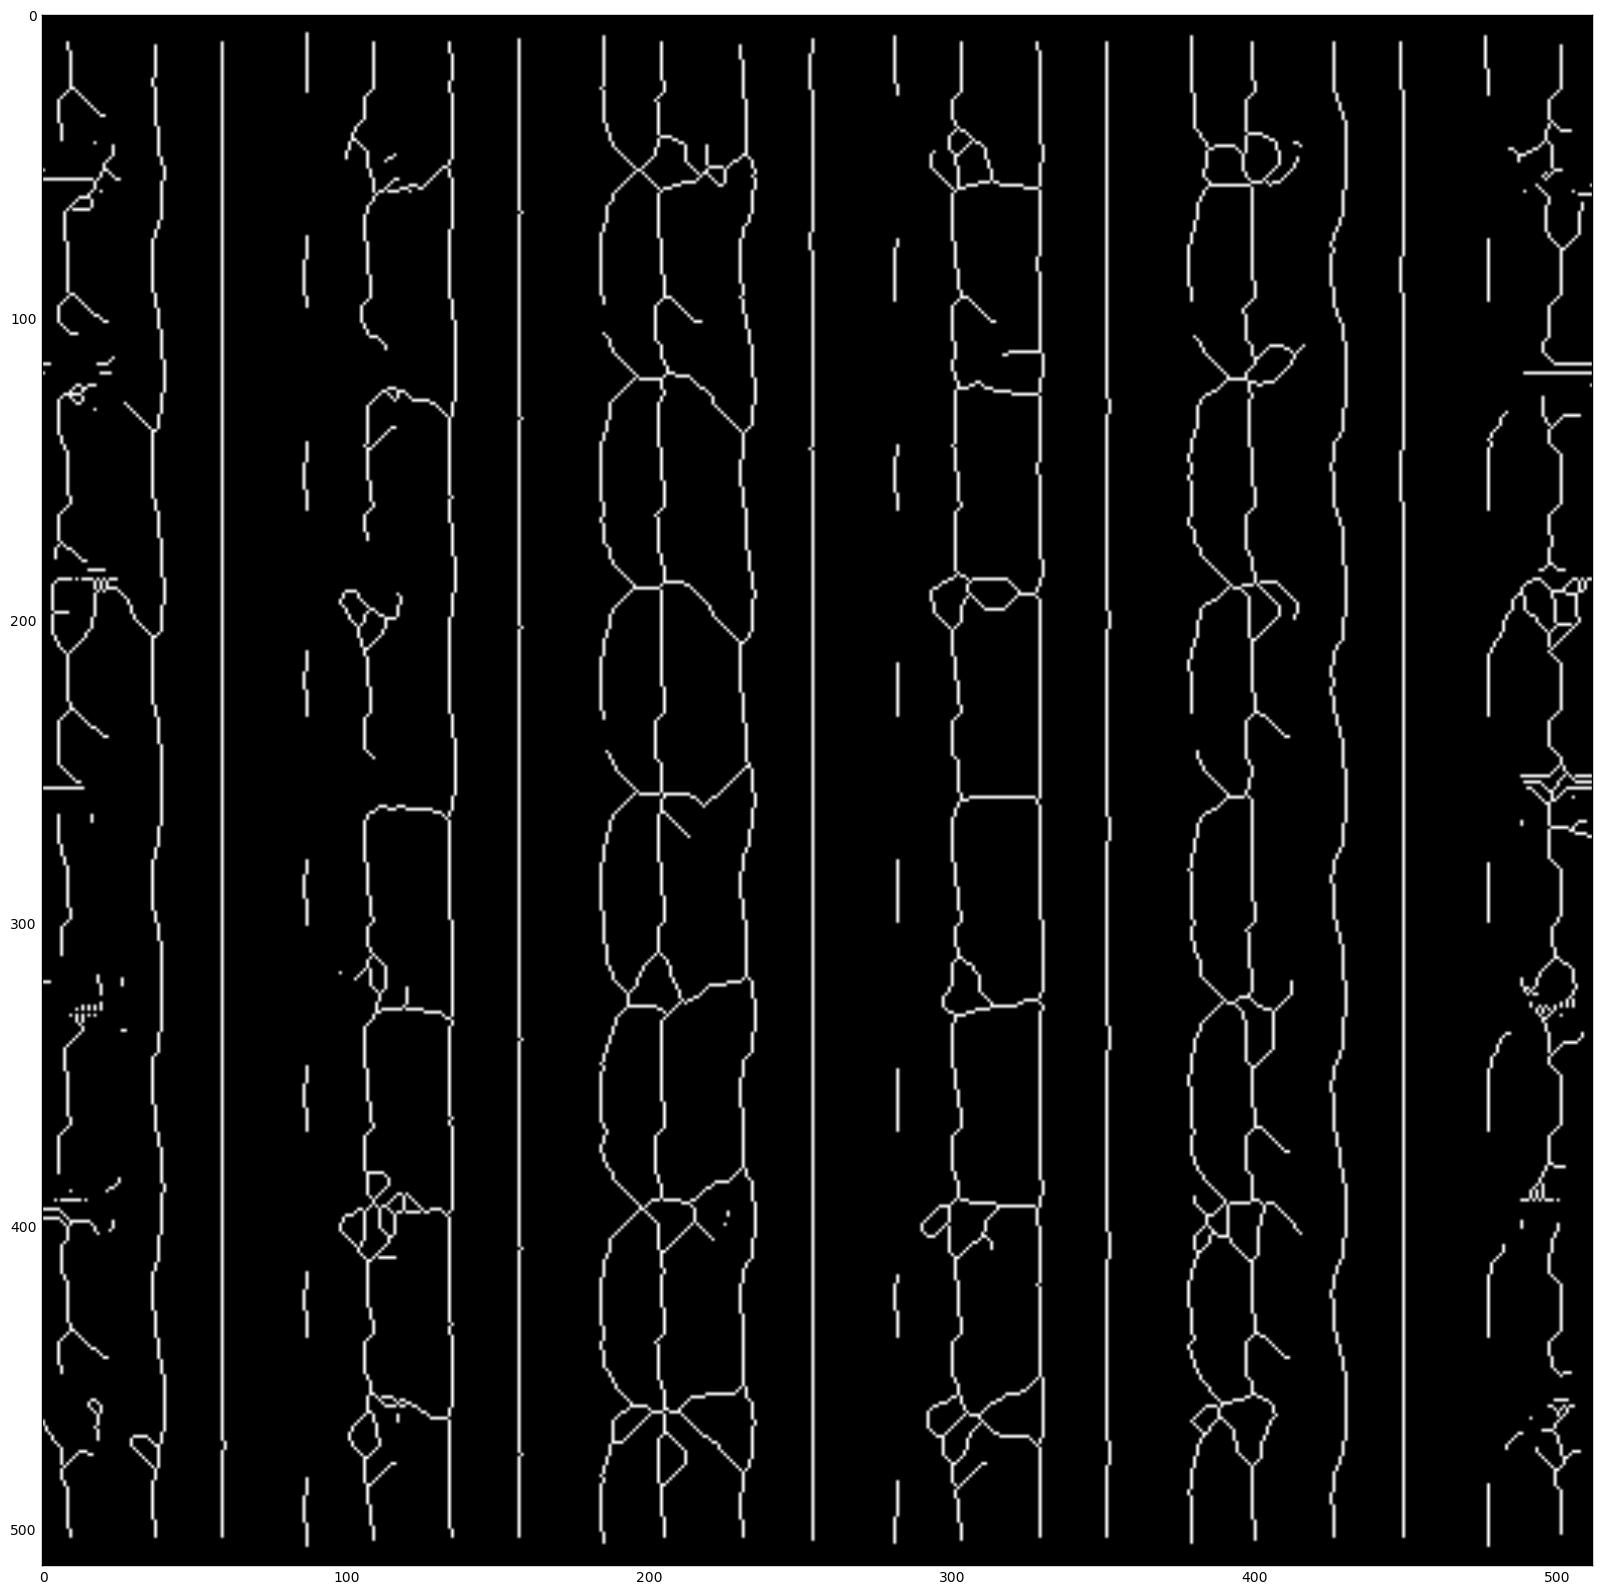

In [3]:
#Esqueletonizacion
iBUENA = k.loadImage("Cuadrado.png")
i2 = k.prepareImage(iBUENA, w=0.4)
i3 = convolve(i2, k.W)
i32 = convolve(i2, k.W)
i4 = k.binarizeImage(i3)
i5 = skeletonize_3d(i4)
k.showImage(i4)
k.showImage(i5)

In [4]:
lines = probabilistic_hough_line(i5,theta=np.linspace(-0.4,0.4,600),line_length=10 )

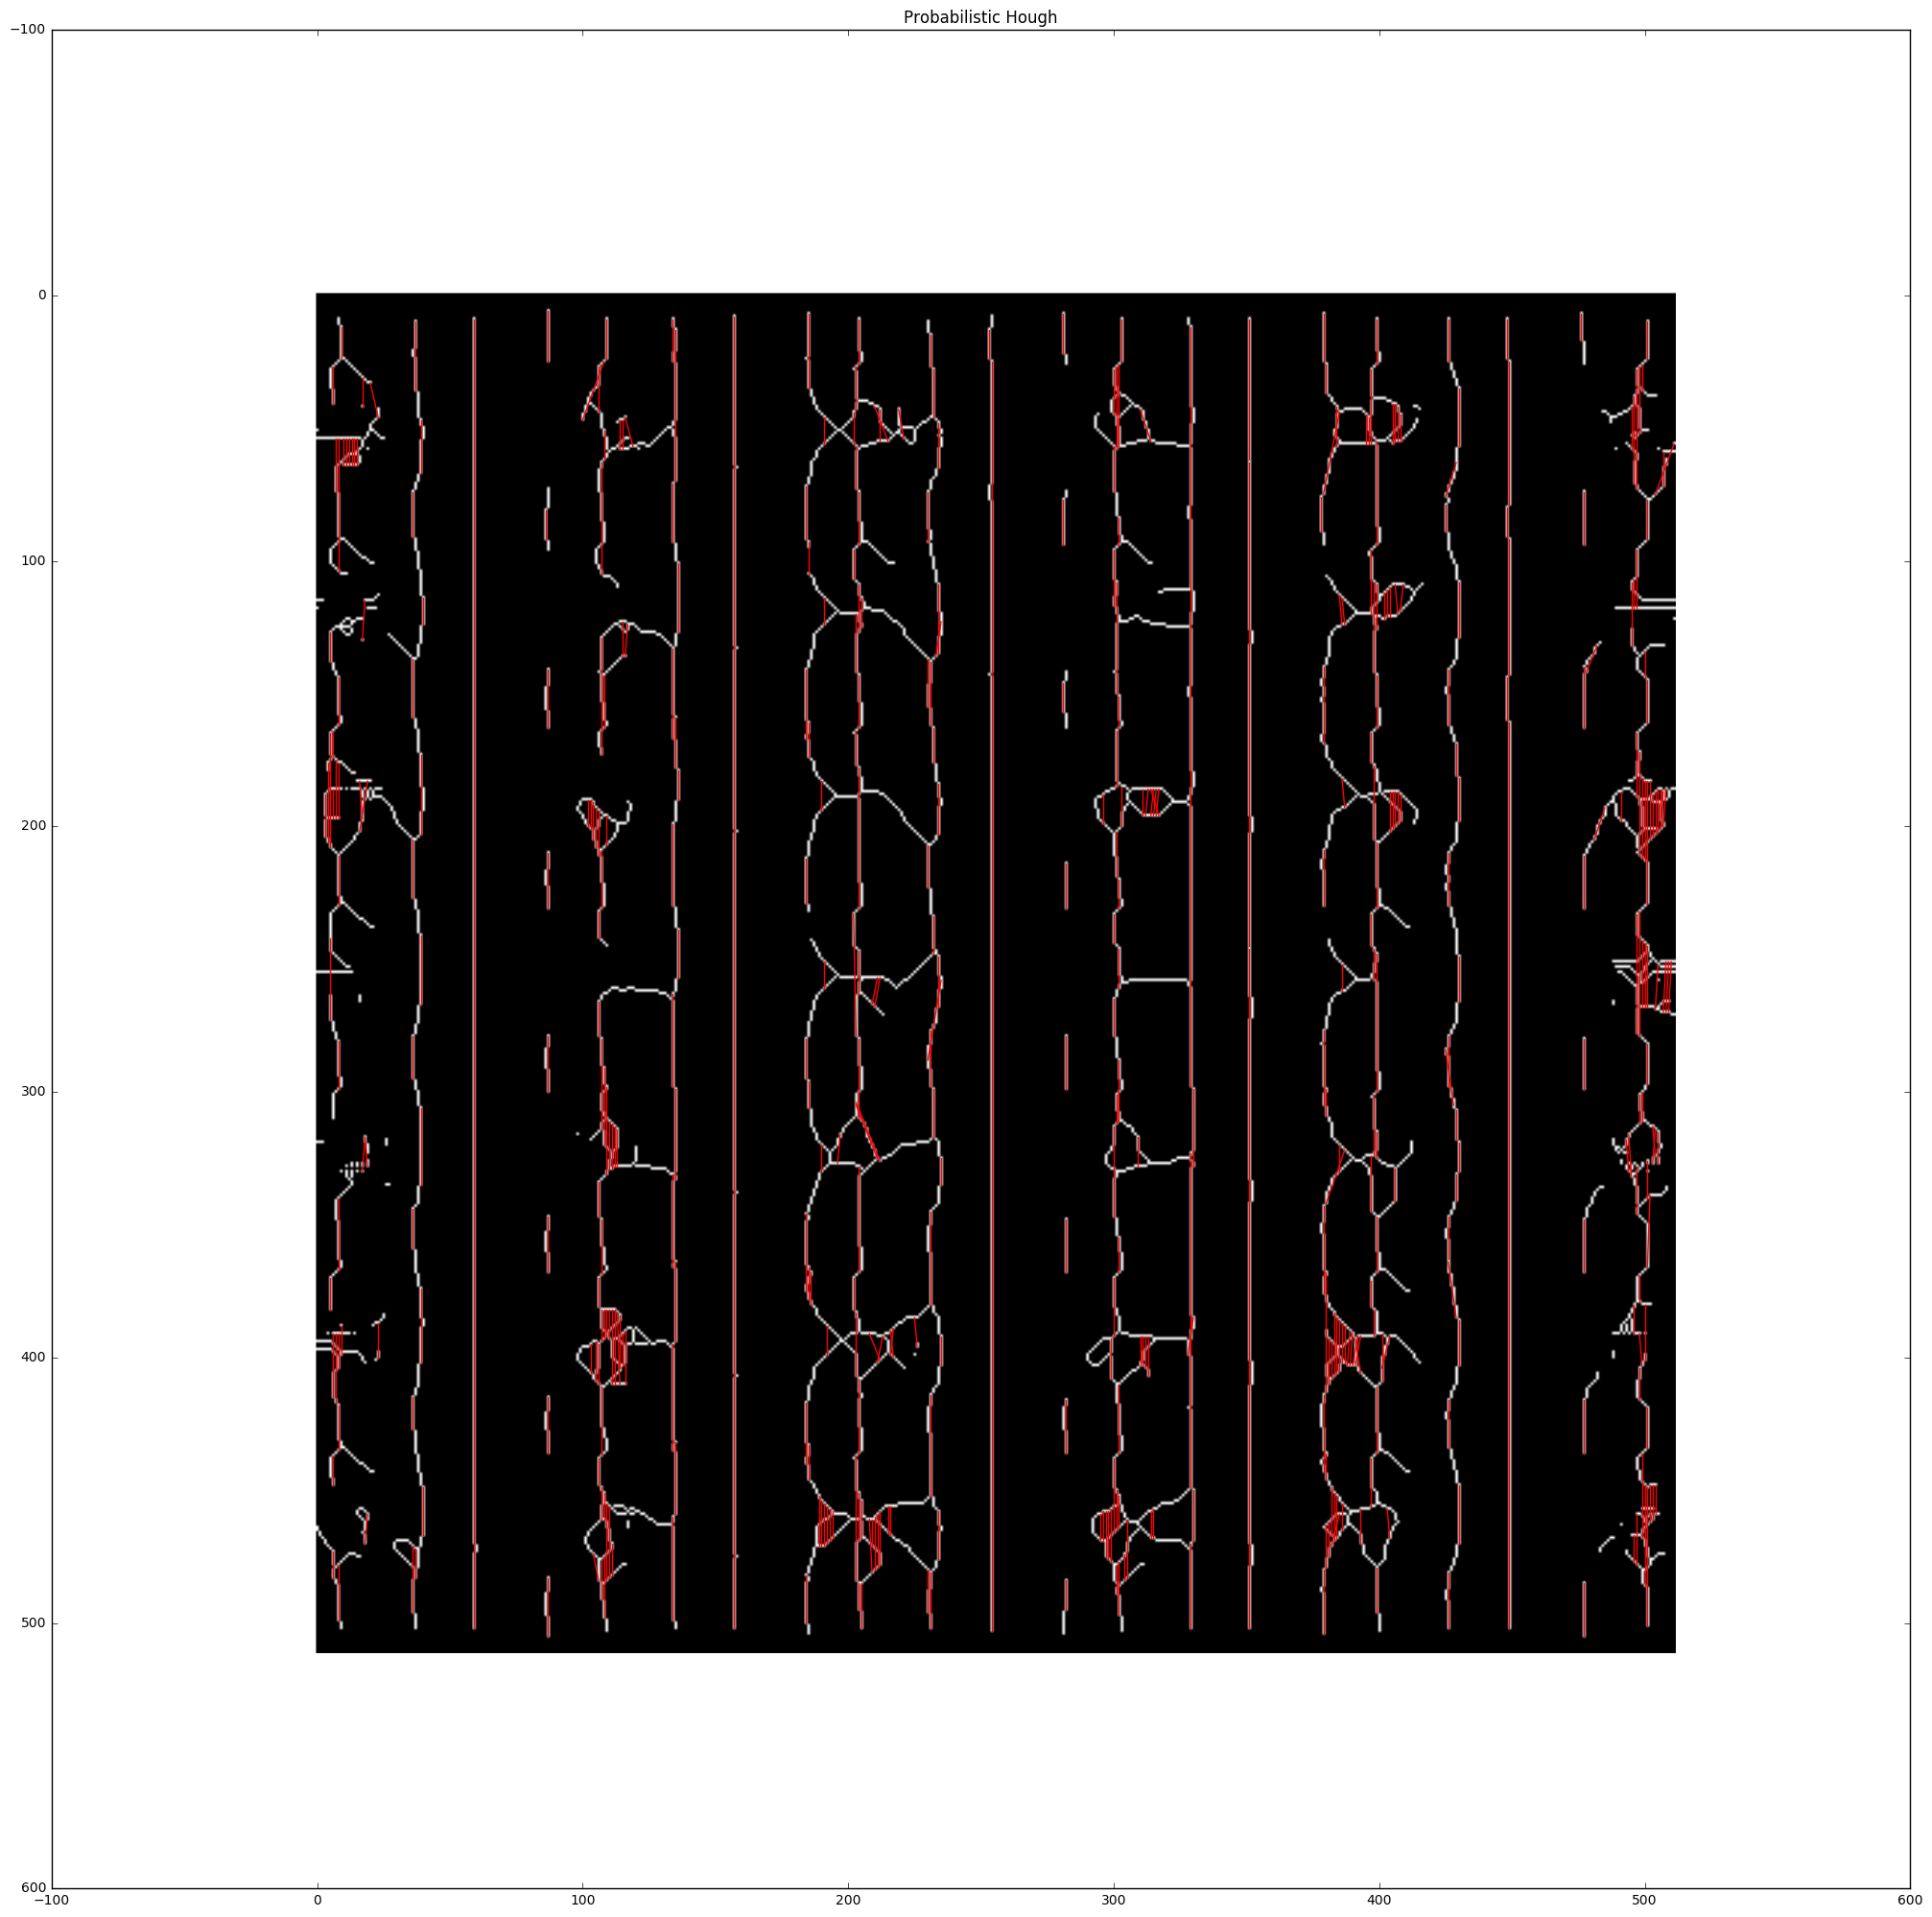

In [5]:
fig = plt.figure(figsize=(25, 25))
plt.imshow(i5, cmap=plt.cm.gray)
plt.title('Probabilistic Hough')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=1)
plt.show()

In [6]:
from skimage.color import grey2rgb
from skimage.draw import line
def saveFilteredImage(imgSk, lines, savePath):
    img = grey2rgb(imgSk)
    for coord in lines:
        rr, cc = line(coord[0][1], coord[0][0], coord[1][1], coord[1][0])
        img[rr, cc] = [255, 0, 0]
    saveImage(img,savePath)

In [88]:
len(empty)

512

In [92]:
#Skeletonizada
imgSkAux = np.copy(i5)
# Save skeletonize
print(len(i5))
print(len(i5[0]))
"""
for i in range(len(i5)):
    for j in range(len(i5[0])):
        if (i5[i][j]==0):
            np.put(imgSkAux[i][j], [0], [np.array([0,0,0,1], np.uint8)])
            #imgSkAux[i][j] = np.array([0,0,0], np.uint8)
        else:
            np.put(imgSkAux[i][j], [0], [np.array([255,0,0,1], np.uint8)])
            #imgSkAux[i][j] = np.array([255, 0, 0], np.uint8)
#Save detected
io.imsave("C:\\Users\\Andres\\Desktop\\PRUEBA.png", imgSkAux)
"""
empty = list()
[empty.append([]) for height in range(len(i5))]
"""
for i in range(len(i5)):
    for j in range(len(i5[0])):
        empty[i].append([])
"""
for i in range(len(i5)):
    for j in range(len(i5[0])):
        if (i5[i][j]==0):
            empty[i].append([0,0,0,255]) 
            #empty[i][j] = [0,0,0,1]
        else:
            empty[i].append([255,0,0,255]) 
            #empty[i][j] = [255, 0, 0,1]
#Save detected
io.imsave("C:\\Users\\Andres\\Desktop\\PRUEBA.png", empty)


SyntaxError: invalid syntax (<ipython-input-92-35205c9da658>, line 22)

In [118]:
saveFilteredImage(i5, lines, "SquareDetected.jpg")

In [120]:
saveImage(i5,"SquareSkeletonize.jpg")

In [126]:
saveImage2(i4,"SquareBinarize.jpg")

In [128]:
i3 = convolve(i2, k.W)
i32 = convolve(i2, k.N)

saveImage2(i3,"SquareWest.jpg")
saveImage2(i32,"SquareNorth.jpg")

In [129]:
from _frangi import frangi, hessian

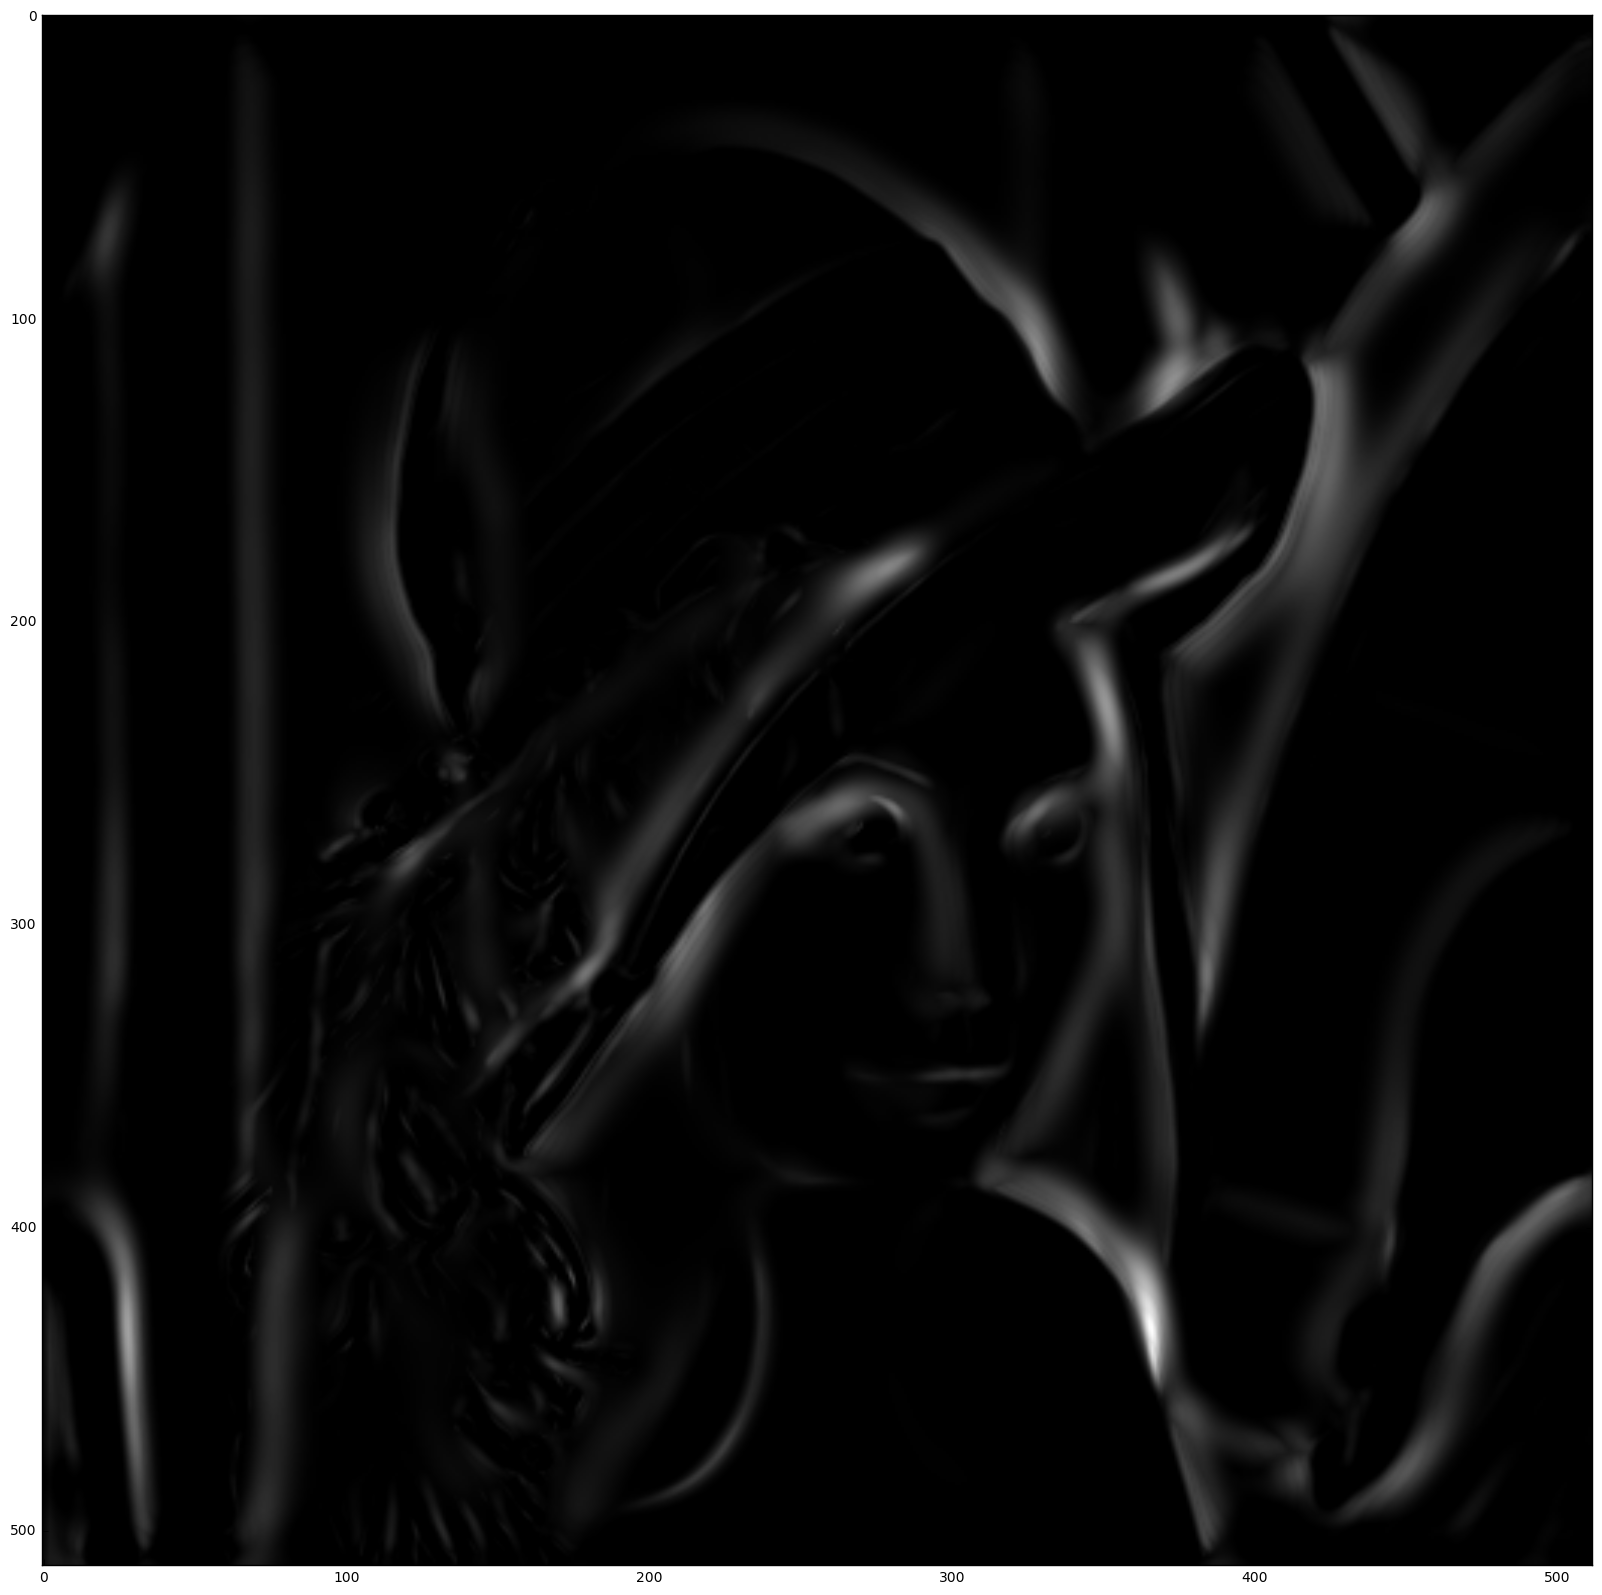

In [136]:
imgFrangi = frangi(rgb2gray(img))
k.showImage(imgFrangi)
saveImage2(imgFrangi, "LennaFrangi.jpg");

In [23]:
"""
iBUENA = k.loadImage("Cuadrado.png")
i2 = k.prepareImage(iBUENA, w=0.4)
i3 = convolve(i2, k.W)
i32 = convolve(i2, k.W)
i4 = k.binarizeImage(i3)
i5 = skeletonize_3d(i4)
"""
i6 = np.copy(i5)


"""
np.full((3, 5), 7)
array([[ 7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  7.,  7.]])

>>> np.full((3, 5), 7, dtype=int)
array([[7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7]])
"""

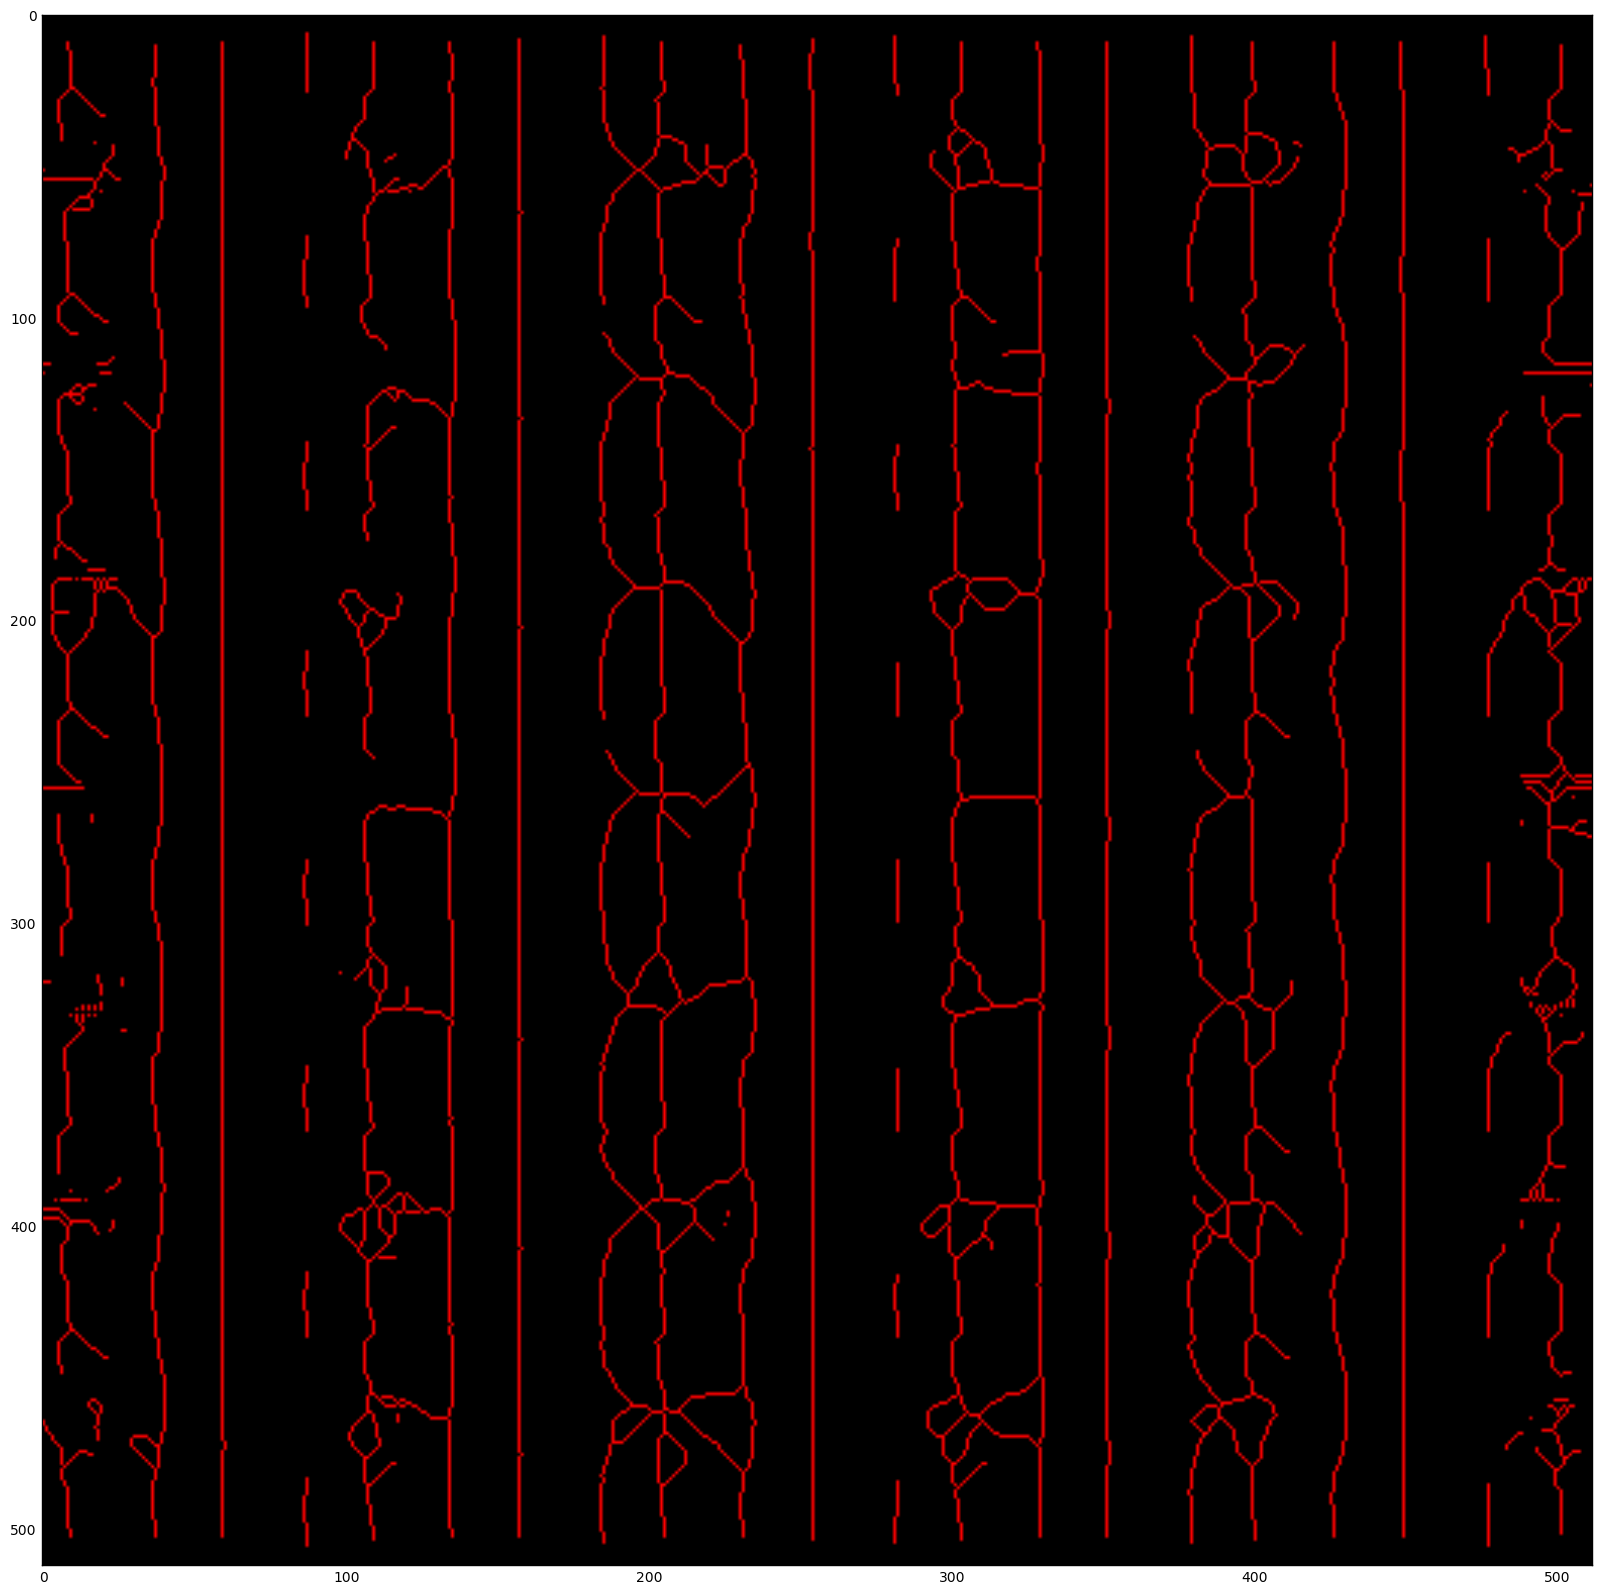

In [48]:
#i7 = np.full((len(i5),len(i5[0])), [0,0,0], dtype=np.uint8)
i7 = np.full_like(iBUENA,[0,0,0,255])
i7[i5==255]=[255,0,0,255]
k.showImage(i7)

In [65]:
i8 = np.empty((len(iBUENA),len(iBUENA[0])),dtype=object)

In [66]:
i8.fill([0,0,0])

TypeError: Image data can not convert to float

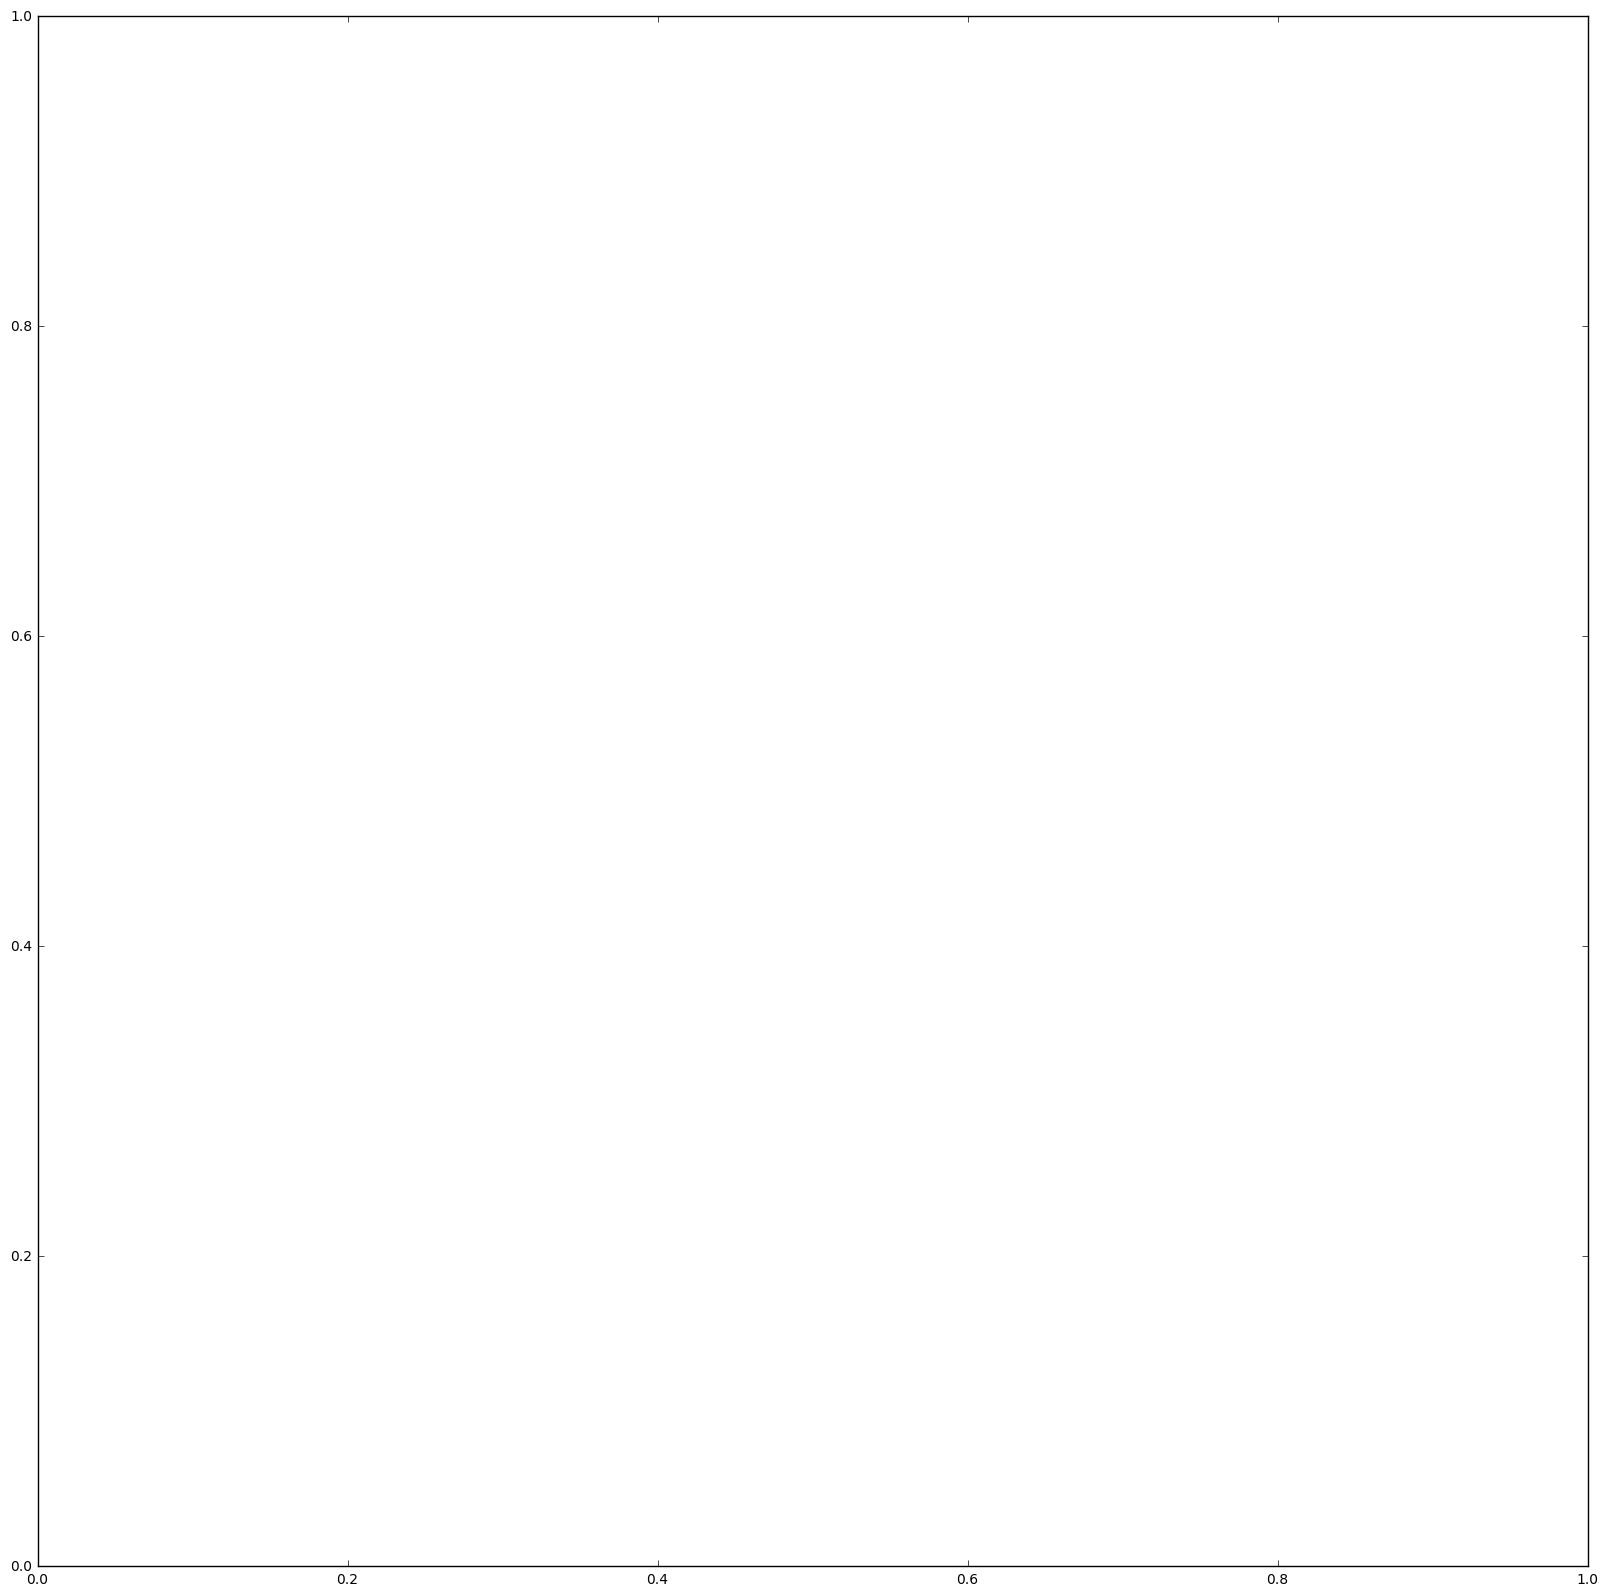

In [68]:
k.showImage(i8)